<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Sophie Gee>
    <Section 3>
    <11/30/21>

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy import special

In [11]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

mean for x1: 9.0, mean for y1: 7.501
var for x1: 0.351, var for y1: 0.258
mean for x2: 9.0, mean for y2: 7.501
var for x2: 0.351, var for y2: 0.258
mean for x3: 9.0, mean for y3: 7.5
var for x3: 0.351, var for y3: 0.258
mean for x4: 9.0, mean for y4: 7.501
var for x4: 0.351, var for y4: 0.258
Means and Variances are almost exactly same for all data sets, however, no regression slope is the same.


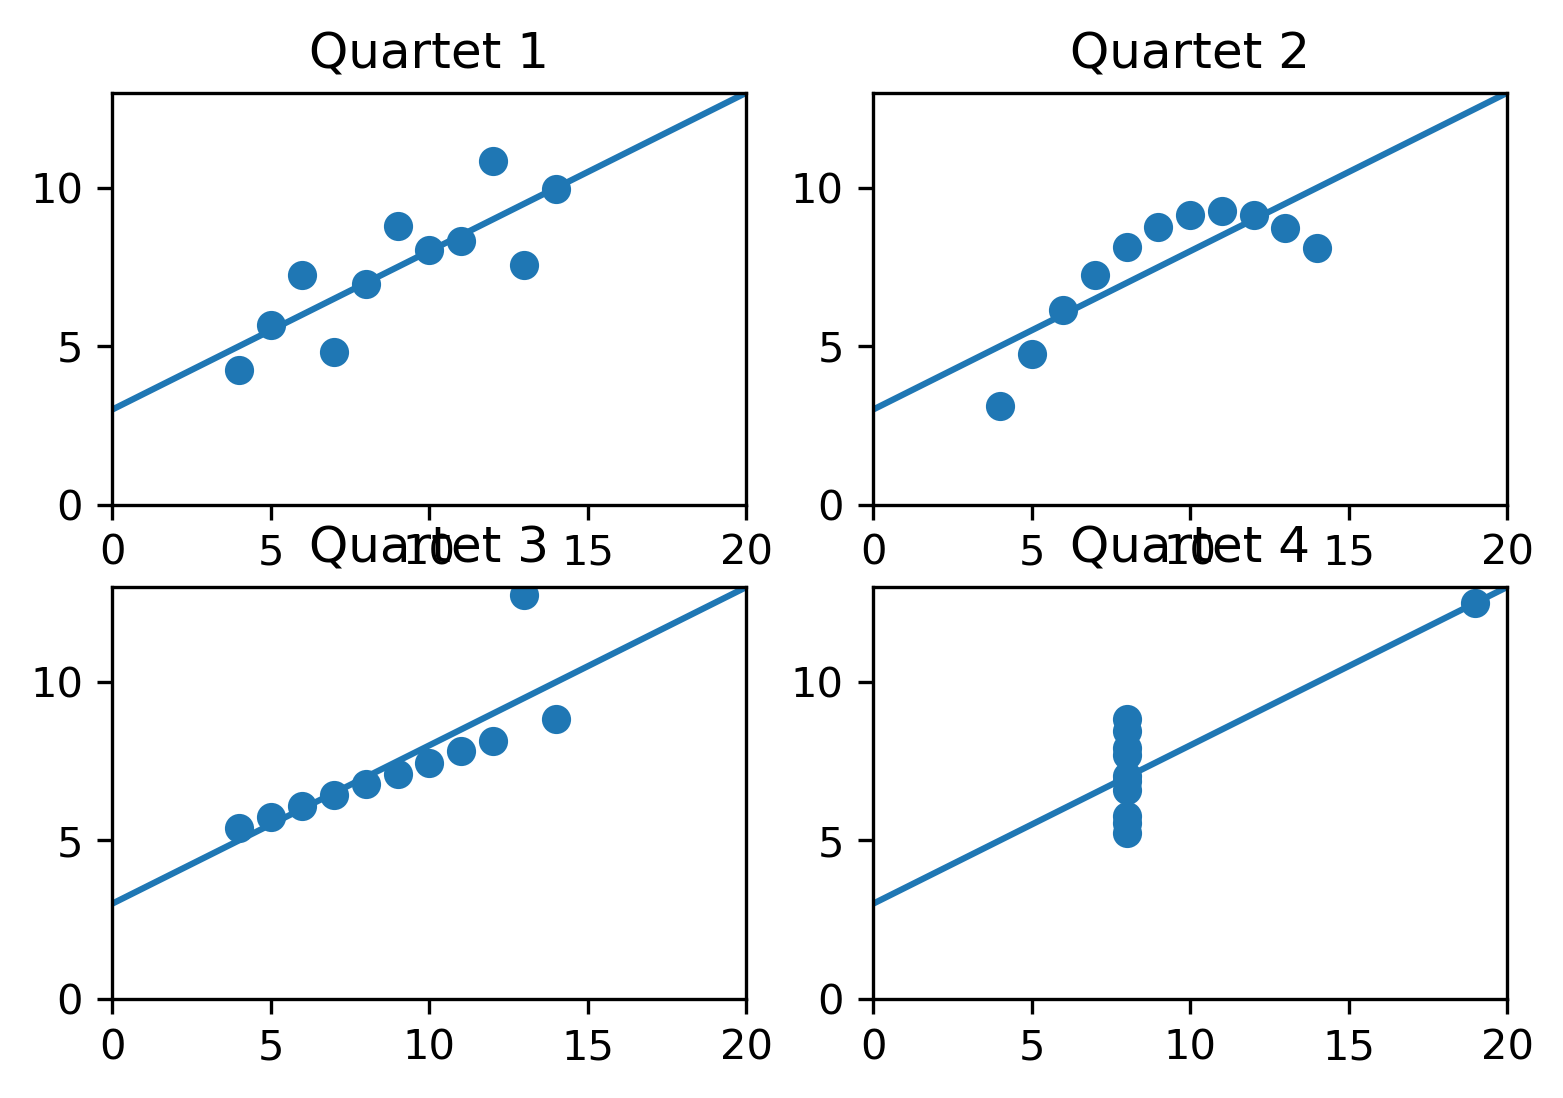

In [37]:
A = np.load("anscombe.npy")

#go through each quartet
for i in range(4):
    #make a subplot
    plt.subplot(2,2,i+1)
    #get each x and y
    x = A[:,2*i]
    y = A[:,2*i+1]
    plt.scatter(x,y)
    #set domain
    plt.xlim([0,20])
    plt.ylim([0,13])
    #plot regression line
    regress = stats.linregress(x,y)
    domain = np.linspace(0,20,1000)
    y1 = regress.intercept+(regress.slope*domain)
    plt.plot(domain,y1)
    plt.title(f"Quartet {i+1}")
    print(f"mean for x{i+1}: {round(np.mean(x),3)}, mean for y{i+1}: {round(np.mean(y),3)}")
    print(f"var for x{i+1}: {round(stats.variation(x),3)}, var for y{i+1}: {round(stats.variation(y),3)}")
print("Means and Variances are almost exactly same for all data sets, however, no regression slope is the same.")
plt.show()

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

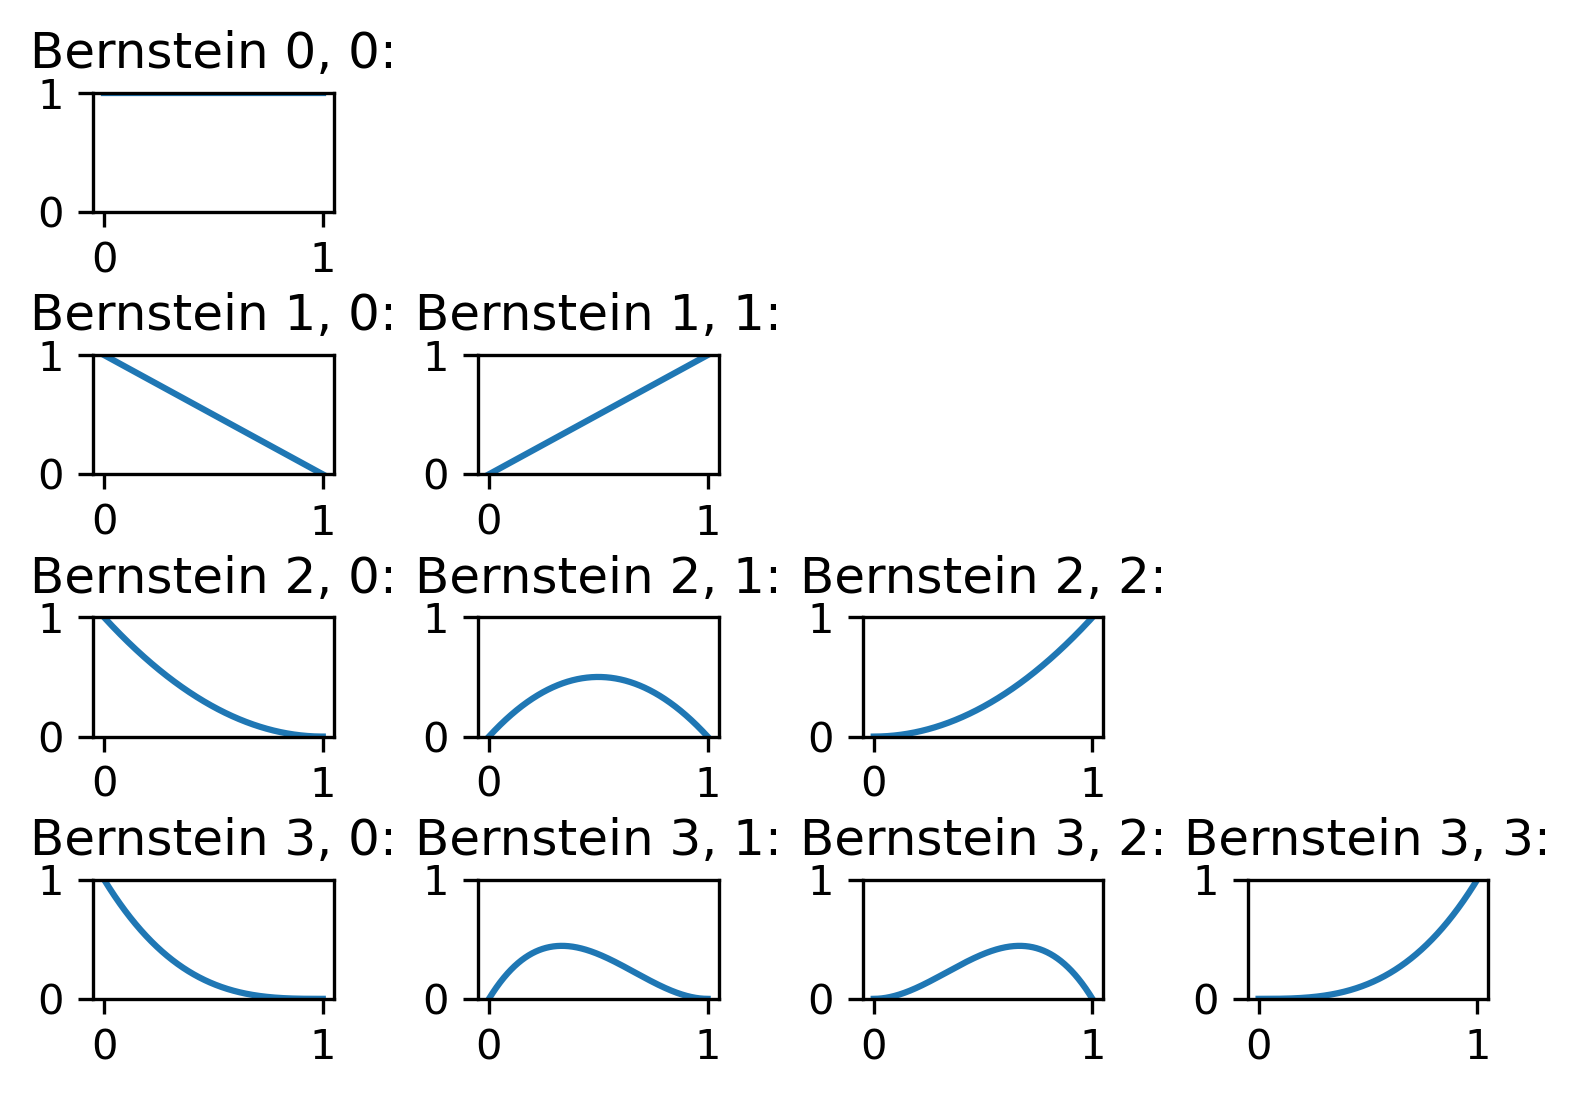

In [43]:

#make two for loops, one for n and one for v
for n in range(4):
    for v in range(n+1):
        #create each subplot in corresponding axis
        plt.subplot(4,4,(4*n)+v+1)
        coef = special.binom(n,v)
        domain = np.linspace(0,1,1000)
        plt.ylim(0,1)
        #calculate bernstein function using domain
        y = coef*(domain**v)*(1-domain)**(n-v)
        plt.plot(domain,y)
        plt.title(f"Bernstein {n}, {v}:")
#reconfigure subplots
plt.subplots_adjust(wspace=.6,hspace=1.2)
plt.show()



### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

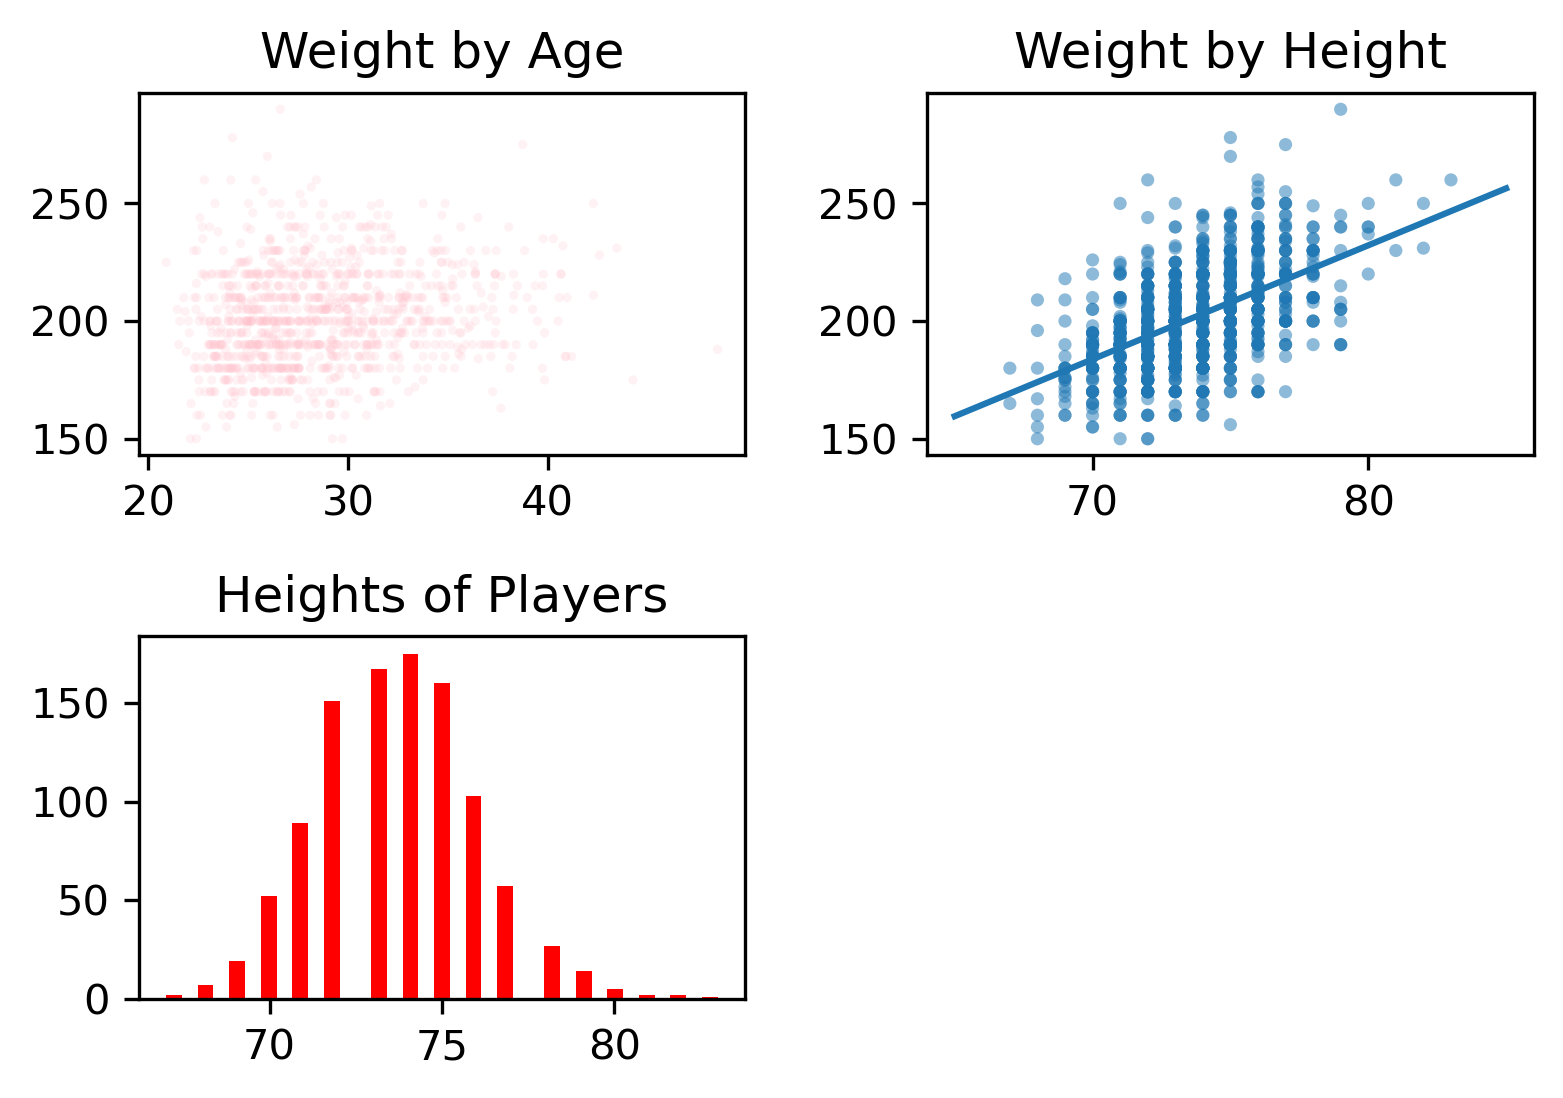

In [70]:
height, weight, age = np.load("MLB.npy").T

#plot 3 different visualizations

#scatter plot 1
plt.subplot(221)
plt.scatter(age, weight, alpha=.2, color='pink', edgecolor='none', s=5)
plt.title("Weight by Age")

#scatter plot 2
plt.subplot(222)
plt.scatter(height, weight, alpha=.5, edgecolor='none', s = 10)
#plot regression line
regress = stats.linregress(height,weight)
domain = np.linspace(65,85,1000)
y1 = regress.intercept+(regress.slope*domain)
plt.plot(domain,y1)
plt.title("Weight by Height")

#histogram
plt.subplot(223)
plt.hist(height, bins=35, color= "red")
plt.title("Heights of Players")
plt.subplots_adjust(wspace=.3,hspace=.5)
plt.show()


### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

5.0 9.1


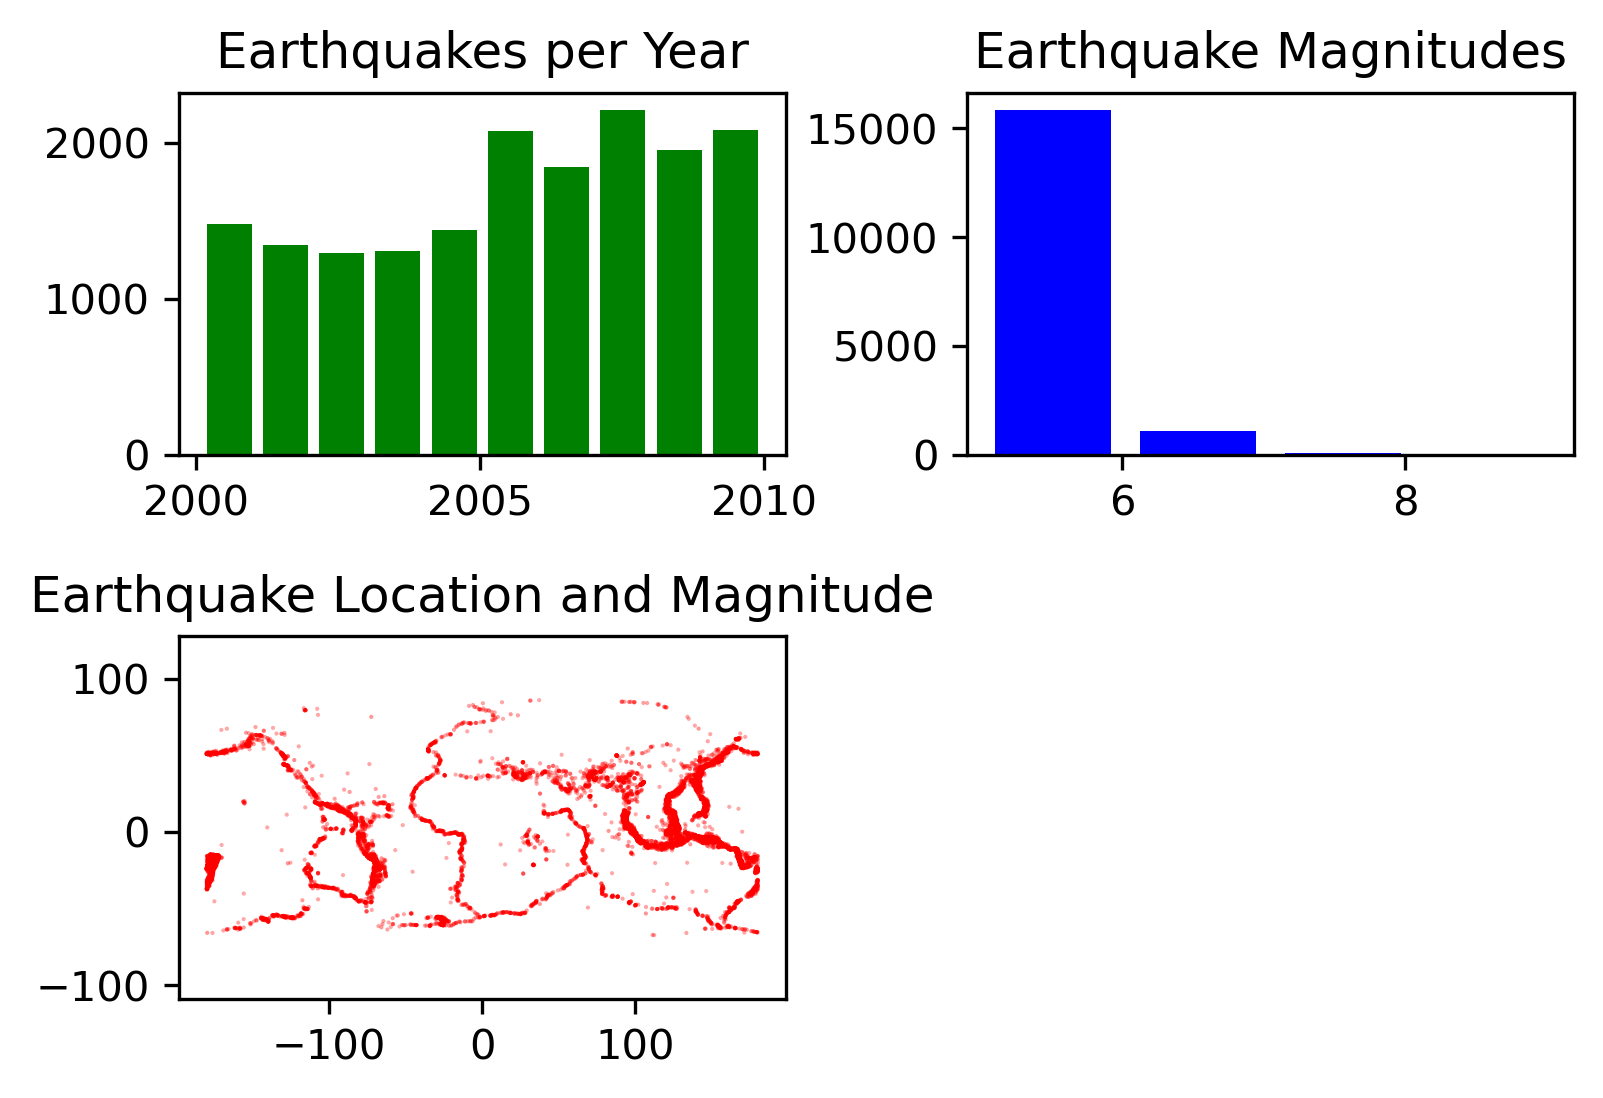

In [84]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

#histogram of years when earthquakes occur
plt.subplot(221)
plt.hist(years, bins=10, color= "green", rwidth=.8)
plt.title("Earthquakes per Year")


#histogram of strength of magnitudes
plt.subplot(222)
plt.hist(magnitudes, bins=4, color= "blue", rwidth=.8)
plt.title("Earthquake Magnitudes")


#scatter plot of where earthquakes happen and strongest ones
plt.subplot(223)
plt.scatter(longitude, latitude, alpha=magnitudes/15, color='red', edgecolor='none', s=1)
plt.title("Earthquake Location and Magnitude")
plt.axis("equal")
plt.subplots_adjust(wspace=.3,hspace=.5)
plt.show()


### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

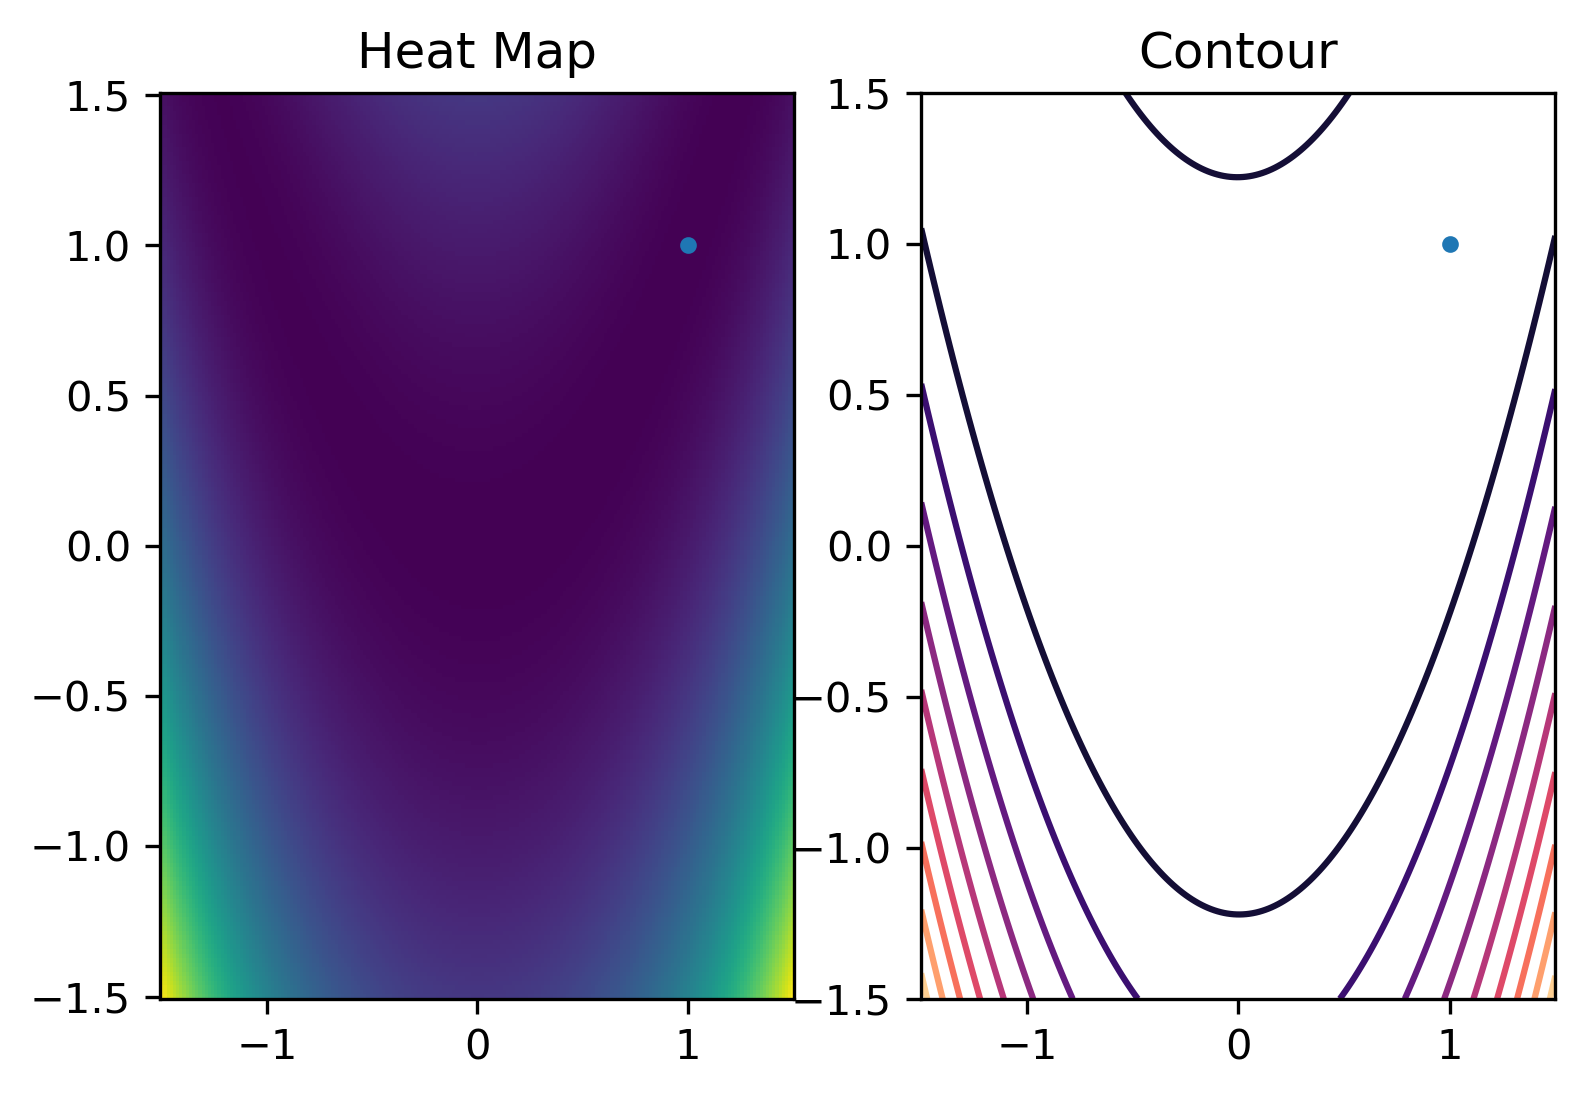

In [88]:
#set up function in terms of X and Y
x = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, x)
Z = (1-X)**2+100*(Y-X**2)**2

#heat map
plt.subplot(121)
plt.pcolormesh(X, Y, Z, cmap="viridis", shading = "auto")
plt.plot(1,1, ".")
plt.title("Heat Map")


#contour map
plt.subplot(122)
plt.contour(X, Y, Z, 12, cmap="magma")
plt.plot(1,1, ".")
plt.title("Contour")

plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

GDP by Population tells us that there is a positive relationship between population and average GDP.
Female Height by Country tells us where the shortest and tallest average women are located.
Male Height by Country tells us where the shortest and tallest average men are located.
Female v Male AVG Heights tells us the average trend between men and women in heights.


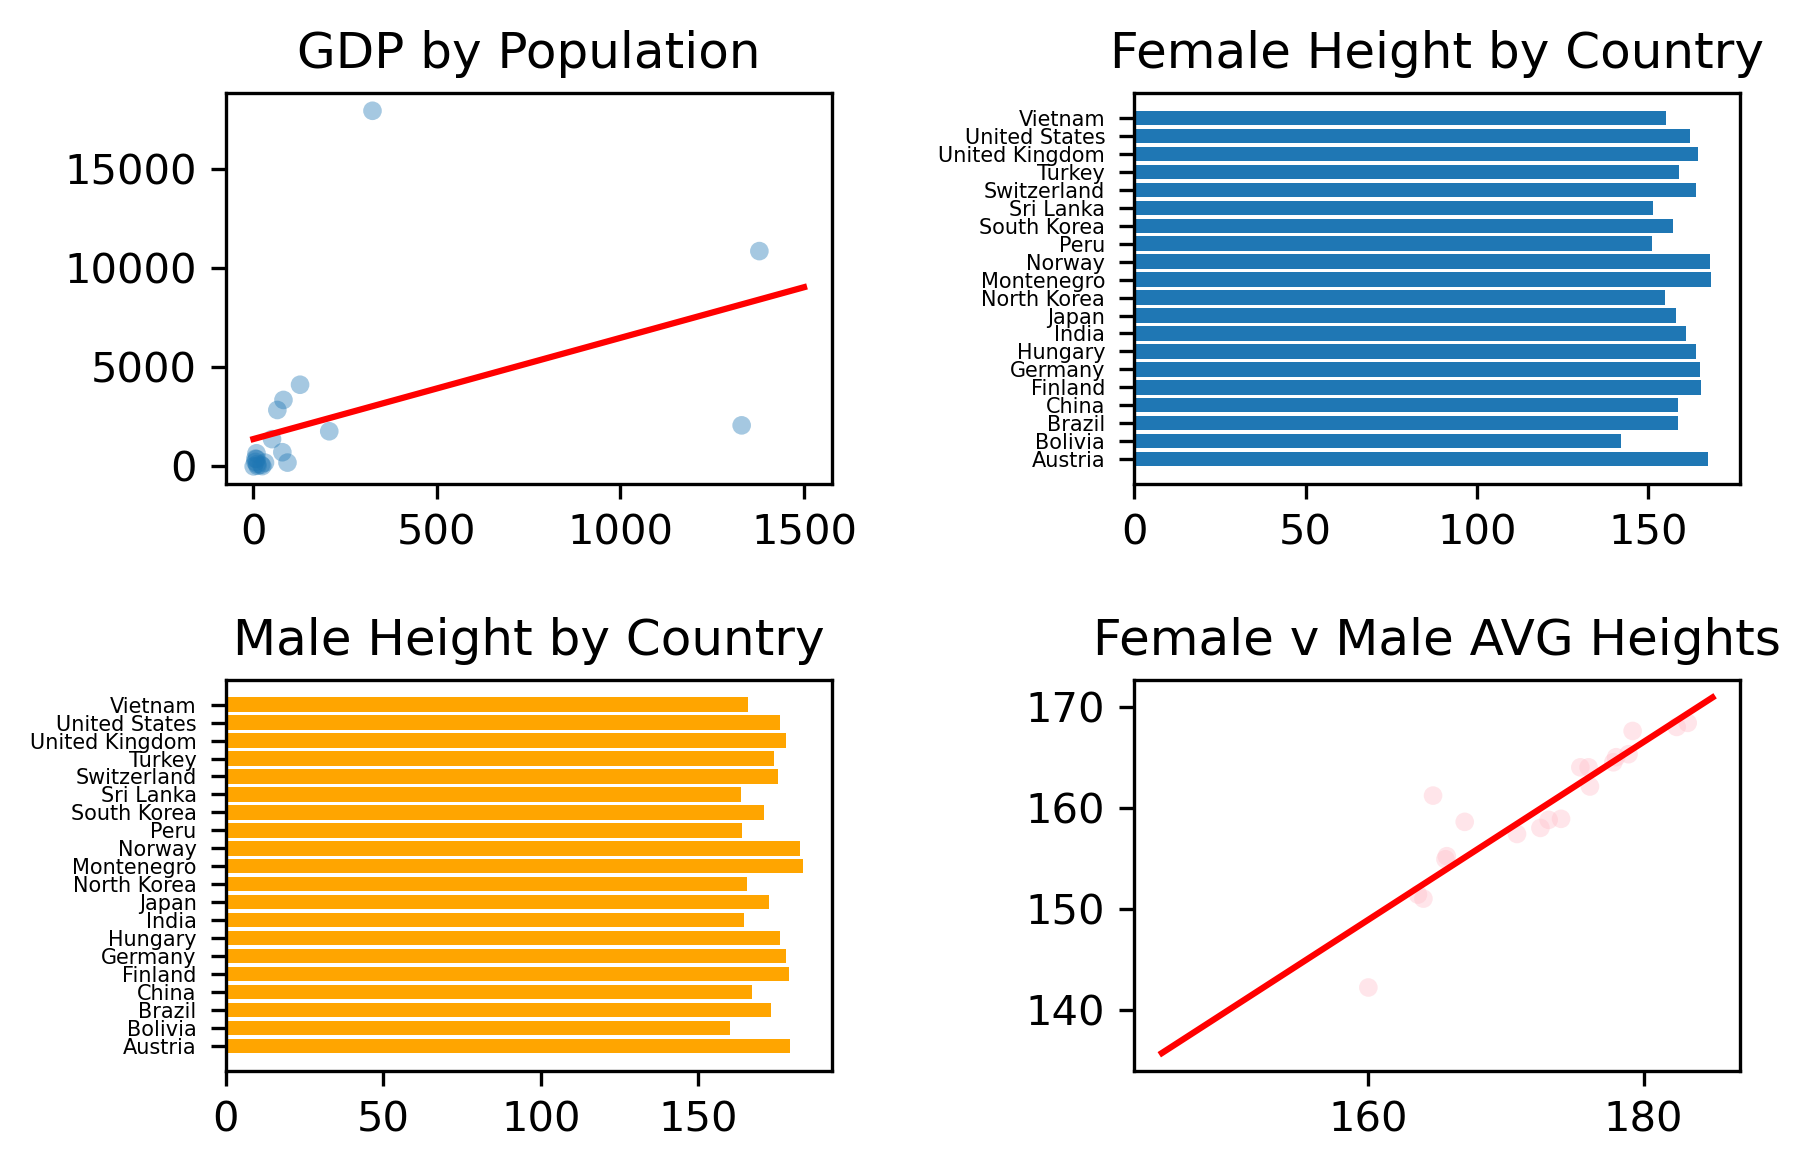

In [109]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

#create 4 subplots

#plot gdp against population
plt.subplot(221)
plt.scatter(population, gdp, alpha=.4, edgecolor='none', s = 20)

#plot regression line
regress = stats.linregress(population,gdp)
domain = np.linspace(0,1500,10000)
y1 = regress.intercept+(regress.slope*domain)

plt.plot(domain,y1, color="red")
plt.title("GDP by Population")
print("GDP by Population tells us that there is a positive relationship between population and average GDP.")

#plot heights of women by countries
positions = np.arange(len(countries))
plt.subplot(222)
plt.barh(positions, female, align="center") # Horizontal bar char (better).
plt.yticks(positions, countries, fontsize = 5)
plt.tight_layout()
plt.title("Female Height by Country")
print("Female Height by Country tells us where the shortest and tallest average women are located.")

#plot hieghts of men by countries
positions = np.arange(len(countries))
plt.subplot(223)
plt.barh(positions, male, align="center", color= "orange") # Horizontal bar char (better).
plt.yticks(positions, countries, fontsize = 5)
plt.tight_layout()
plt.title("Male Height by Country")
print("Male Height by Country tells us where the shortest and tallest average men are located.")


#plot female height against male
plt.subplot(224)
plt.scatter(male, female, alpha=.4, edgecolor='none', s = 20, color= "pink")

#plot regression line
regress = stats.linregress(male,female)
domain = np.linspace(145,185,10000)
y1 = regress.intercept+(regress.slope*domain)
plt.plot(domain,y1, color="red")
plt.title("Female v Male AVG Heights")
print("Female v Male AVG Heights tells us the average trend between men and women in heights.")

plt.subplots_adjust(wspace=.5,hspace=.5)